# Data Science Interview Challenge

### Part 1 - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#load data

df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
# Load the data directly from the JSON file
logins_df = pd.read_json('logins.json')

# Convert the timestamp column to datetime
logins_df['login_time'] = pd.to_datetime(logins_df['login_time'])

# Set 'login_time' as the index
logins_df.set_index('login_time', inplace=True)

# Resample the data to 15-minute intervals and count logins in each interval
login_counts = logins_df.resample('15T').size()

login_counts.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, dtype: int64

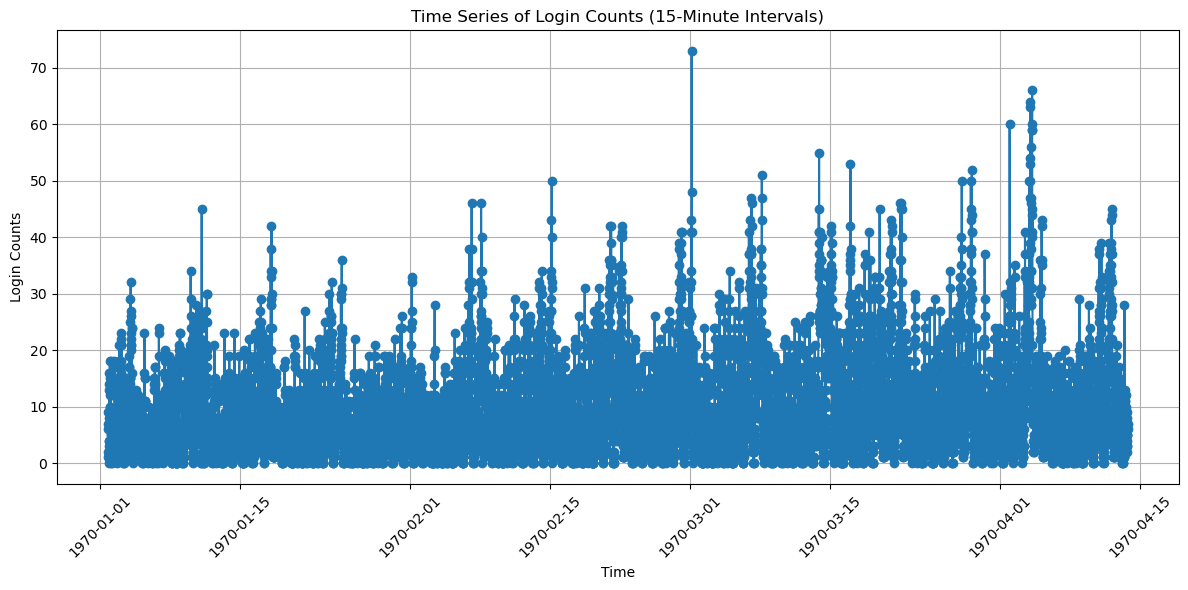

In [4]:
# Plot the time series of login counts
plt.figure(figsize=(12, 6))
plt.plot(login_counts.index, login_counts.values, linestyle='-', marker='o')
plt.title('Time Series of Login Counts (15-Minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

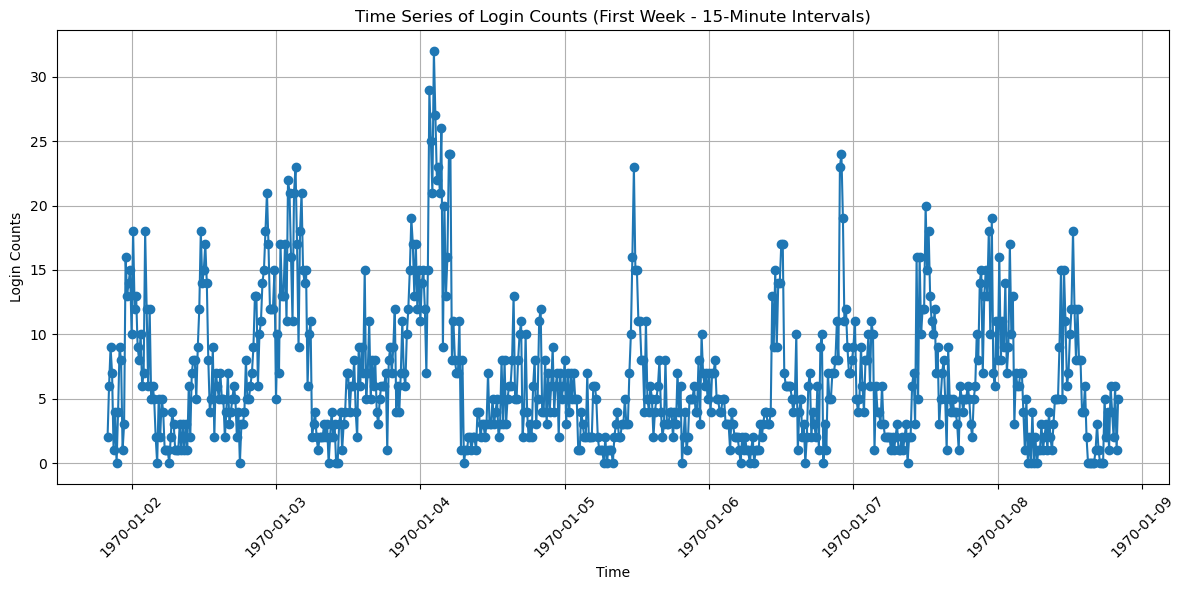

In [5]:
# Filter data for the first week (adjust the start and end dates as needed)
start_date = login_counts.index.min()
end_date = start_date + pd.DateOffset(days=7)
filtered_data = login_counts[(login_counts.index >= start_date) & (login_counts.index <= end_date)]

# Plot the time series of login counts for the first week
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data.values, linestyle='-', marker='o')
plt.title('Time Series of Login Counts (First Week - 15-Minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

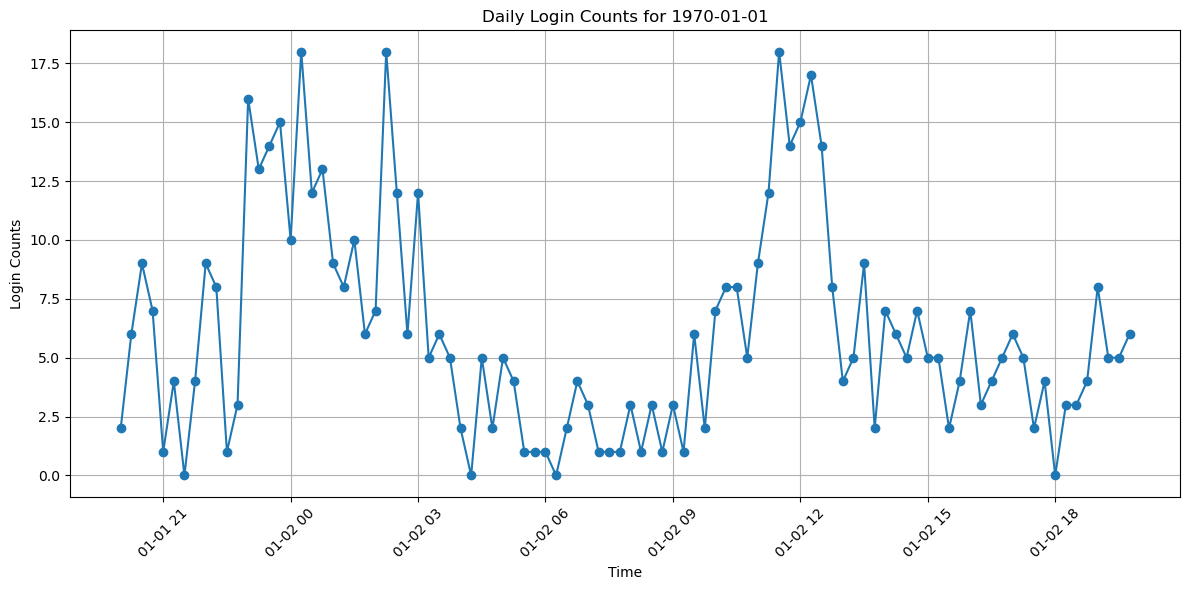

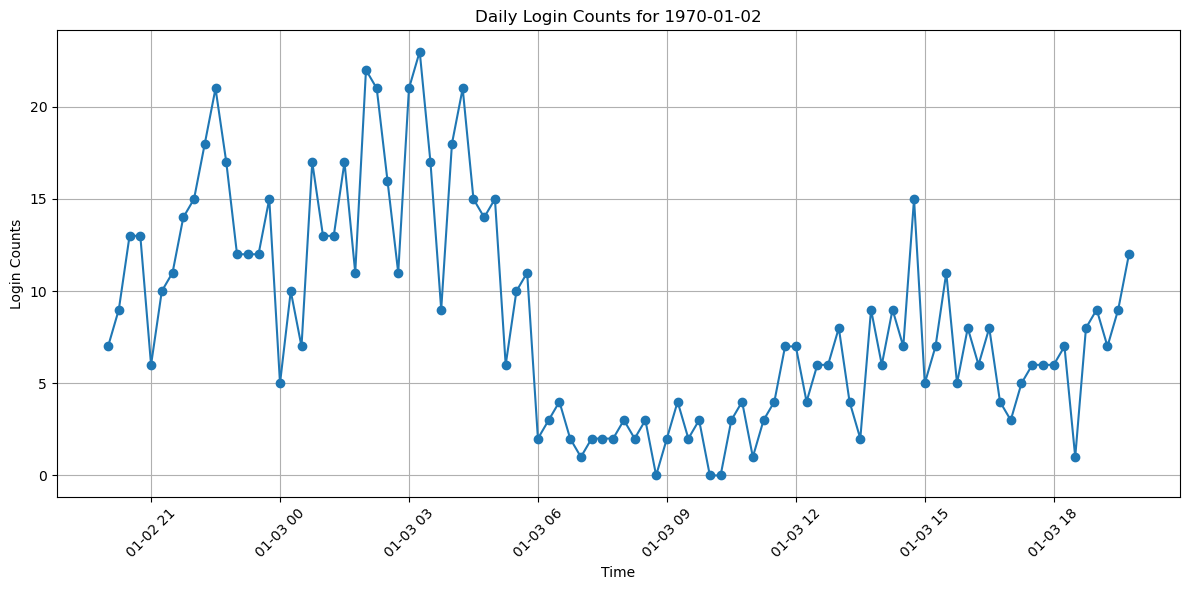

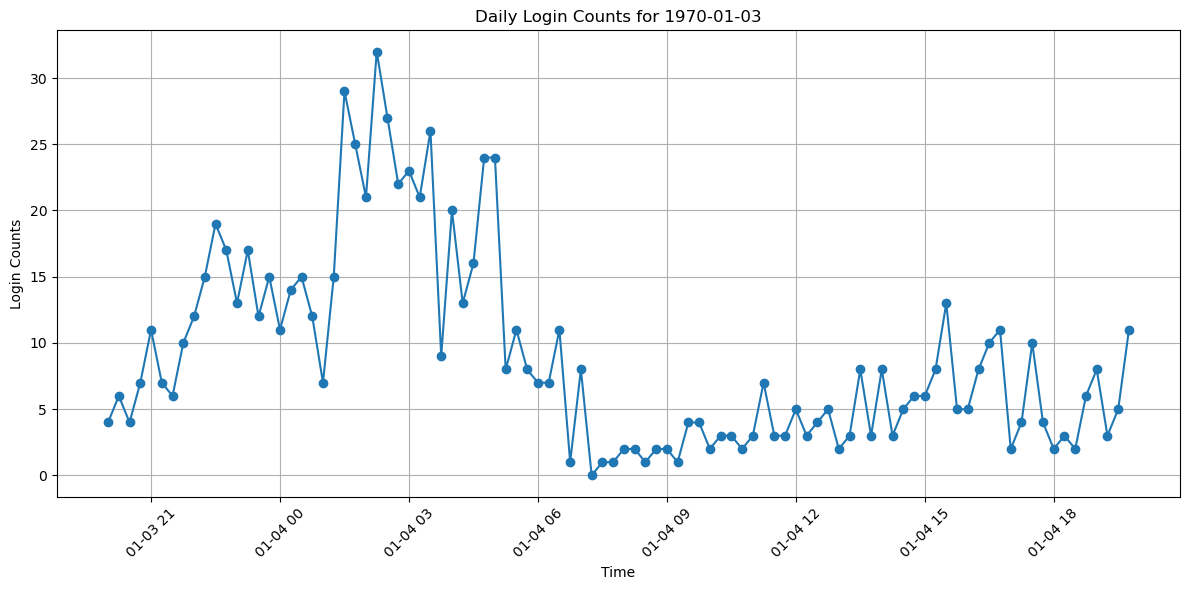

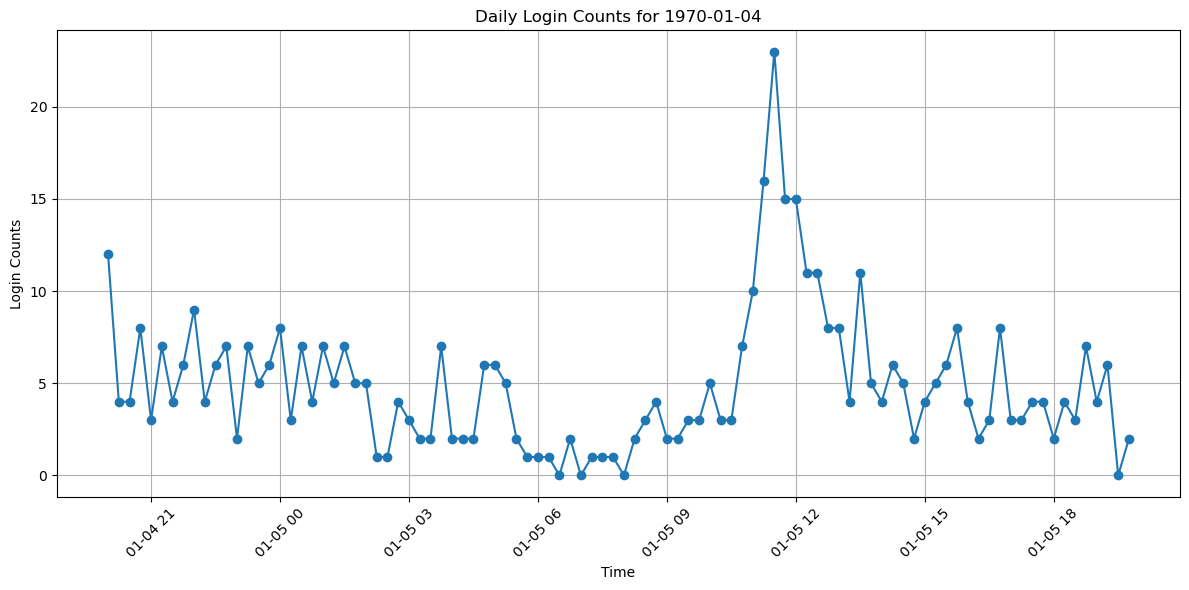

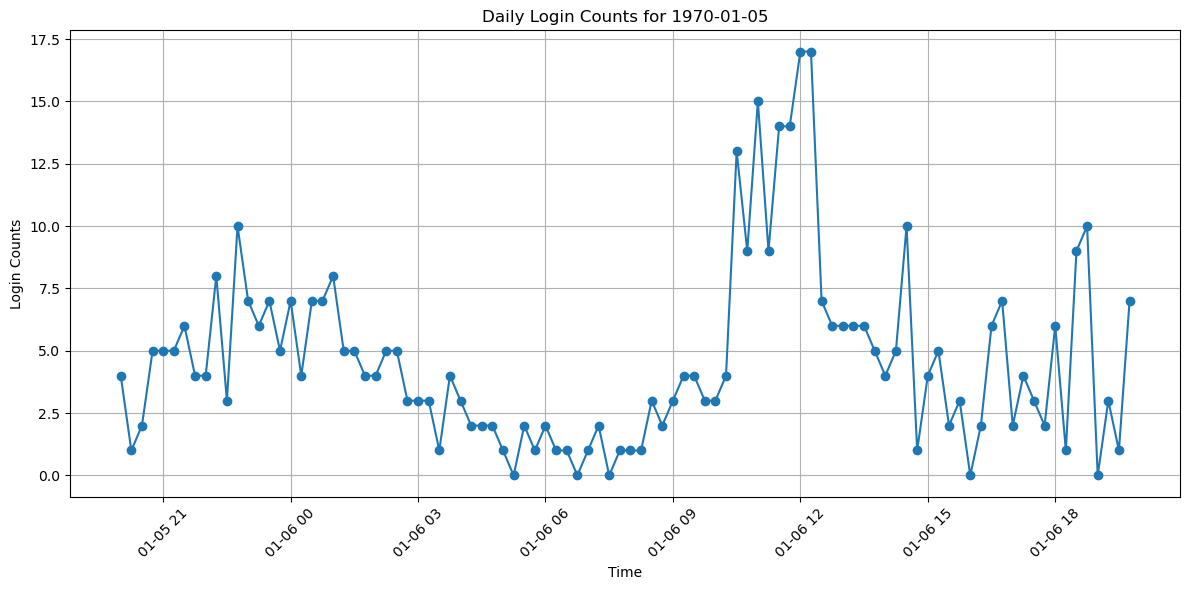

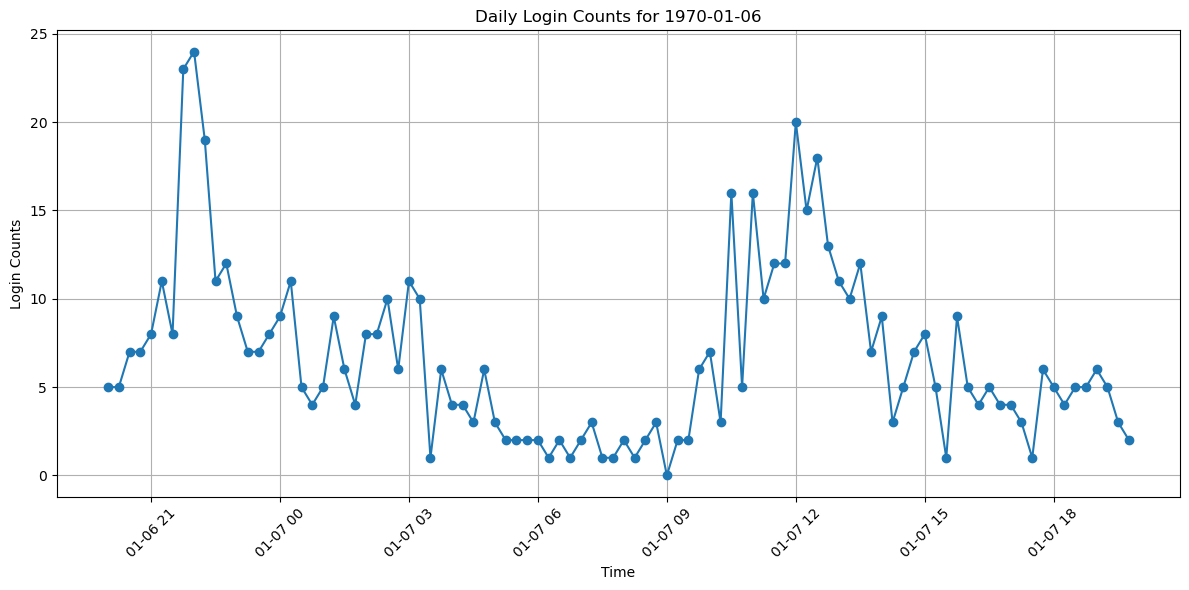

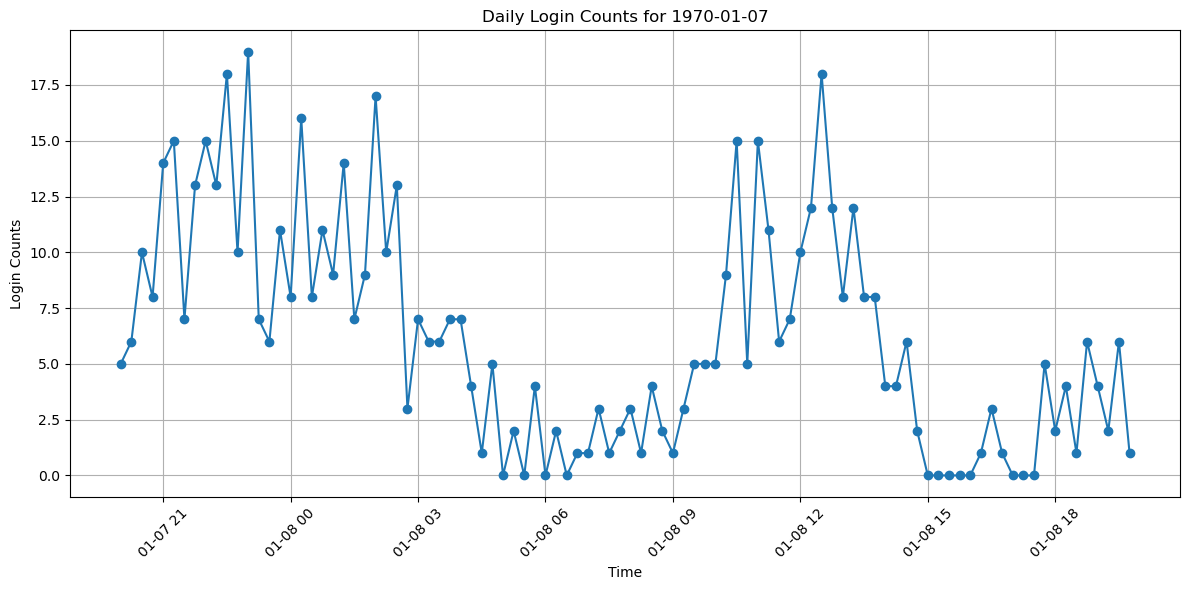

In [6]:
# Define the start date for the first 7 days
start_date = login_counts.index.min()
end_date = start_date + pd.DateOffset(days=7)

# Create a separate plot for each day
for day in range(7):
    day_data = login_counts[(login_counts.index >= start_date) & (login_counts.index < start_date + pd.DateOffset(days=1))]
    
    plt.figure(figsize=(12, 6))
    plt.plot(day_data.index, day_data.values, linestyle='-', marker='o')
    plt.title(f'Daily Login Counts for {start_date.strftime("%Y-%m-%d")}')
    plt.xlabel('Time')
    plt.ylabel('Login Counts')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Move to the next day
    start_date += pd.DateOffset(days=1)

In [7]:
# Sort the login counts in descending order
sorted_login_counts = login_counts.sort_values(ascending=False)

# Get the top N intervals with the highest counts (e.g., top 10)
top_intervals = sorted_login_counts.head(10)
bottom_intervals = sorted_login_counts.tail(10)

print(top_intervals)
print()
print(bottom_intervals)

login_time
1970-03-01 04:30:00    73
1970-04-04 05:30:00    66
1970-04-04 01:30:00    64
1970-04-04 01:15:00    63
1970-04-01 23:30:00    60
1970-04-04 05:00:00    60
1970-04-04 04:45:00    59
1970-04-04 05:15:00    59
1970-04-04 01:45:00    56
1970-03-13 22:15:00    55
dtype: int64

login_time
1970-02-16 06:15:00    0
1970-02-16 06:30:00    0
1970-01-11 09:00:00    0
1970-01-27 15:15:00    0
1970-01-11 09:30:00    0
1970-01-11 09:45:00    0
1970-02-16 08:15:00    0
1970-01-27 08:30:00    0
1970-01-27 08:15:00    0
1970-02-11 06:45:00    0
dtype: int64


In [8]:
login_counts.describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
dtype: float64

# Data Analysis Report

## Exploratory Data Analysis of User Logins

### Introduction
This report presents an exploratory data analysis of user login activity in a particular geographic location. The analysis is based on a dataset of login timestamps, which have been aggregated into 15-minute intervals.

### Key Findings

#### Daily Cycles
- Daily login activity shows clear patterns, with two prominent peaks.
- Lunchtime Peak: There is a noticeable peak around 12 PM, suggesting that many users log in during their lunch breaks.
- Afternoon Peak: Another peak is observed in the late afternoon or early evening, with login counts ranging between 17.5 to 25 in the 15-minute intervals.

#### Variability
- The data exhibits a wide range of login counts. Most intervals have counts up to 30 logins.
- Spikes: Occasional spikes in login activity are observed, with counts between 30 and 50.
- High-Traffic Intervals: Some intervals experience exceptionally high traffic, with counts exceeding 50, reaching as high as 73.

#### Seasonality and Events
- Seasonal patterns are not explicitly discussed in the data, but external events, promotions, or holidays may correlate with increased login activity.
- Event-Driven Peaks: It's important to investigate and understand any login activity spikes associated with planned events or promotions.

### Recommendations

1. **Resource Optimization:** Consider optimizing resources during peak login times, such as lunch hours and late afternoons, to ensure responsive service and a seamless user experience.

2. **User Engagement:** Leverage the understanding of daily cycles to tailor notifications, promotions, or features to align with user behavior patterns. This can enhance user engagement during peak hours.

3. **Data Quality Check:** Perform a thorough data quality check to address any anomalies or data issues that may affect the accuracy of the analysis.

4. **Further Analysis:** For a more in-depth analysis, consider investigating the underlying causes of login spikes, potentially through additional data sources or domain knowledge.

### Conclusion
The exploratory data analysis provides insights into the daily login patterns, variability, and potential external influences on user activity. Understanding these patterns is valuable for optimizing resources and enhancing the user experience.

------------------------------------------------------------

# Part 2 - Experiment and Metrics Design

# Experiment and Metrics Design Report

## Introduction

This report outlines the experimental design and key metrics for assessing the effectiveness of a proposed change in encouraging driver partners to serve both neighboring cities, Gotham and Metropolis, during their respective peak hours. The primary goal is to maximize driver earnings by participating in the dual city driving program.

## Key Measure of Success

The key measure of success for this experiment is the potential increase in driver profits achieved by switching between cities. The chosen metric, "Profit Differential," represents the difference in profit made by drivers who switch to the high-traffic city during peak hours compared to drivers who stay exclusively in one city. A positive profit differential indicates that the program successfully increases driver earnings.

## Experimental Design

### Implementation

1. **Control and Experimental Groups**: Driver partners are divided into two groups: control and experimental.
2. **Randomization**: Drivers are randomly assigned to control or experimental groups.
3. **Data Collection**: Earnings, ride volume, customer ratings, and other relevant metrics are collected for both groups.
4. **Experiment Duration**: The experiment is run over a significant period, such as several weeks or months, to gather sufficient data.

### Statistical Testing

5. **Hypothesis Testing**: Formulate null (H0) and alternative (H1) hypotheses. For example:
   - H0: The dual city driving program has no significant impact on driver earnings.
   - H1: The dual city driving program significantly increases driver earnings.
6. **Statistical Tests**: Select appropriate statistical tests (e.g., t-tests, ANOVA, or regression) to compare earnings between control and experimental groups.
7. **Significance Level**: Choose a significance level (alpha) to determine statistical significance.

### Interpretation and Recommendations

8. **Data Analysis**: Perform statistical tests to compare earnings and relevant metrics between groups.
9. **Results Interpretation**: Analyze results and assess statistical significance of differences.
10. **Recommendations**: If the experimental group demonstrates a significant increase in earnings, provide recommendations to the city operations team, such as program expansion and optimization.
11. **Caveats**: Discuss potential limitations or caveats of the experiment, including external factors and data quality issues.

## Conclusion

The experimental design and key metric of profit differentials provide a structured approach to evaluating the effectiveness of the dual city driving program. The objective is to increase driver earnings by encouraging participation in both cities during peak hours. The design includes randomization, data collection, hypothesis testing, and clear result interpretation.

The success of this experiment will be determined by the statistical significance of the profit differentials and their impact on driver earnings. The findings will inform recommendations to enhance the program and optimize driver profitability.

----------------------------------------

# Part 3

In [9]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [11]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [12]:
# Convert date columns to datetime format
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [13]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Print the null value counts
print(null_counts)

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


## Handling Missing Values

In the dataset, we identified missing values in specific columns. Here's a summary of the columns with missing values and our approach to handle them:

1. **"phone" Column:**
   - Missing Values: 396 out of 50,000 rows.
   - Approach: Imputed missing values with the mode (most frequent category) of the column.

2. **"avg_rating_by_driver" Column:**
   - Missing Values: 201 out of 50,000 rows.
   - Approach: Imputed missing values with the median of the column.

3. **"avg_rating_of_driver" Column:**
   - Missing Values: 8,122 out of 50,000 rows.
   - Approach: Pending. We will determine the best approach to handle this column.

These steps help ensure data completeness and consistency for our analysis.



In [14]:
# Impute "phone" with the mode
mode_phone = df['phone'].mode()[0]
df['phone'].fillna(mode_phone, inplace=True)

# Impute "avg_rating_by_driver" with the median
median_avg_rating_by_driver = df['avg_rating_by_driver'].median()
df['avg_rating_by_driver'].fillna(median_avg_rating_by_driver, inplace=True)

In [15]:
# Calculate quintile ranges for ratings
quintiles = np.linspace(0, 5, 6)  # Divide the range [0, 5] into 5 equal parts
quintile_labels = [f'{quintiles[i]:.1f}-{quintiles[i+1]:.1f}' for i in range(len(quintiles) - 1)]

# Create a new column to categorize ratings into quintile ranges
df['rating_quintile'] = pd.cut(df['avg_rating_of_driver'], bins=quintiles, labels=quintile_labels)

# Count the number of ratings in each quintile range
rating_counts = df['rating_quintile'].value_counts().sort_index()

# Display the counts
print(rating_counts)

0.0-1.0      256
1.0-2.0      219
2.0-3.0     1229
3.0-4.0     6301
4.0-5.0    33873
Name: rating_quintile, dtype: int64


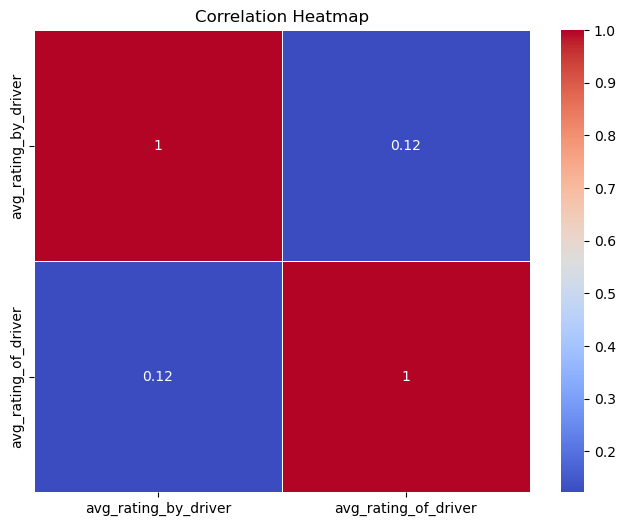

In [16]:
# Calculate the correlation matrix
correlation_matrix = df[['avg_rating_by_driver', 'avg_rating_of_driver']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Impute "avg_rating_of_driver" with the median
median_avg_rating_of_driver = df['avg_rating_of_driver'].median()
df['avg_rating_of_driver'].fillna(median_avg_rating_of_driver, inplace=True)

## Handling Missing Values for "avg_rating_of_driver"

In the dataset, the "avg_rating_of_driver" column contains a substantial number of missing values (8,122 out of 50,000 rows). To ensure data completeness and maintain the overall distribution of ratings, we have decided to handle the missing values as follows:

1. **Imputation with Median:** We will impute the missing values in the "avg_rating_of_driver" column with the median value of the column. This approach is robust, aligns with the majority of ratings, and mitigates the impact of potential outliers.

2. **Correlation Consideration:** We initially explored the correlation between "average rating by driver" and "average rating of driver." The correlation was found to be relatively weak (0.12), indicating a limited direct relationship. Given the weak correlation, imputing with the median is a reasonable choice.

This approach ensures data integrity and maintains the distribution of ratings in the dataset while addressing the significant number of missing values.



In [18]:
# Drop the "rating_quintile" column
df.drop(columns=['rating_quintile'], inplace=True)

# Check for null values in each column
null_counts = df.isnull().sum()

# Print the null value counts
print(null_counts)

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


In [19]:
# Find the maximum date in the "last_trip_date" column
max_last_trip_date = df['last_trip_date'].max()

# Calculate a date that is 30 days before the maximum date
cutoff_date = max_last_trip_date - pd.Timedelta(days=30)

# Create a target variable based on retention
df['retained'] = df['last_trip_date'] >= cutoff_date

# Find the proportion of True and False in the "retained" column
proportion_retained = df['retained'].value_counts(normalize=True)

print(proportion_retained)

False    0.62392
True     0.37608
Name: retained, dtype: float64


## Calculating the Target Variable and Proportion of Retained Users

In this part of the analysis, we performed the following key steps:

1. **Target Variable Calculation:** We defined the target variable for predicting rider retention based on the provided instruction, which considers a user as "retained" if they were "active" (i.e., took a trip) in the preceding 30 days. To achieve this, we calculated a date that is 30 days before the maximum "last_trip_date" in the dataset for each user.

2. **Proportion of Retained Users:** After creating the target variable, we calculated the proportion of users labeled as "retained" and "not retained" in the dataset. The results showed that approximately 37.61% of users were labeled as "retained," while about 62.39% were labeled as "not retained" based on the 30-day retention criteria.

These steps are essential for setting up the target variable for predictive modeling and understanding the distribution of retained and not retained users in the dataset, which will be valuable for further analysis and modeling.



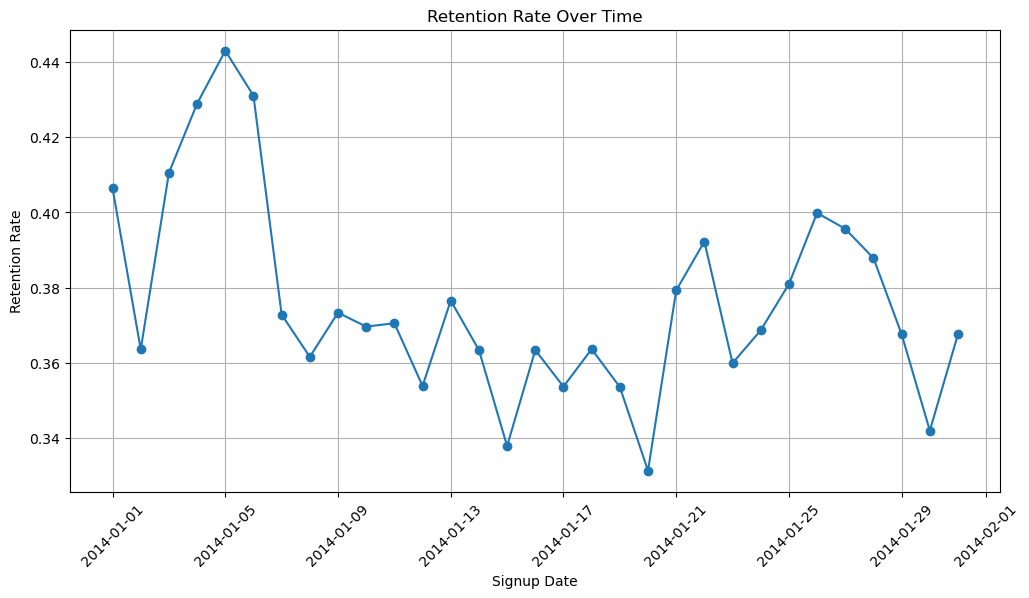

In [20]:
# Group by 'signup_date' and calculate the retention rate
retention_rate = df.groupby('signup_date')['retained'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(retention_rate.index, retention_rate.values, marker='o', linestyle='-')
plt.title("Retention Rate Over Time")
plt.xlabel("Signup Date")
plt.ylabel("Retention Rate")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [21]:
# Assuming 'signup_date' is a datetime column, extract the day of the month and store it in a new column
df['signup_day'] = df['signup_date'].dt.day

# Now we have a new feature 'signup_day' that represents the day of the month when users signed up.

# Drop the 'last_trip_date' column
df = df.drop('last_trip_date', axis=1)

df = df.drop('signup_date', axis=1)

In [22]:
# Apply one-hot encoding to the 'phone' column
df = pd.get_dummies(df, columns=['phone'], drop_first=True)

###  Data Preprocessing and Splitting

In [23]:
from sklearn.model_selection import train_test_split

# Set X to contain all features (all columns except 'retained')
X = df.drop('retained', axis=1)

# Apply one-hot encoding to the 'city' column
X = pd.get_dummies(X, columns=['city'], drop_first=True)

# Set y to contain the 'retained' column
y = df['retained']

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###  Grid Search - Hyperparameter Tuning for Random Forest and XGBoost

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],  
    'max_depth': [10, 20, 30, None],
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV instance
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_n_estimators_rf = grid_search_rf.best_params_['n_estimators']
best_max_depth_rf = grid_search_rf.best_params_['max_depth']

# Print the best hyperparameters
print(f"Best n_estimators for Random Forest: {best_n_estimators_rf}")
print(f"Best max_depth for Random Forest: {best_max_depth_rf}")

Best n_estimators for Random Forest: 150
Best max_depth for Random Forest: 10


In [25]:
from xgboost import XGBClassifier

# Define the hyperparameter grid for XGBoost
param_grid_xgboost = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the XGBoost classifier
xgboost_classifier = XGBClassifier(random_state=42)

# Create a GridSearchCV instance
grid_search_xgboost = GridSearchCV(estimator=xgboost_classifier, param_grid=param_grid_xgboost, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search_xgboost.fit(X_train, y_train)

# Get the best hyperparameters
best_n_estimators_xgboost = grid_search_xgboost.best_params_['n_estimators']
best_max_depth_xgboost = grid_search_xgboost.best_params_['max_depth']
best_learning_rate_xgboost = grid_search_xgboost.best_params_['learning_rate']

# Print the best hyperparameters for XGBoost
print(f"Best n_estimators for XGBoost: {best_n_estimators_xgboost}")
print(f"Best max_depth for XGBoost: {best_max_depth_xgboost}")
print(f"Best learning_rate for XGBoost: {best_learning_rate_xgboost}")

Best n_estimators for XGBoost: 100
Best max_depth for XGBoost: 5
Best learning_rate for XGBoost: 0.2


# Logistic Regression Model

In this section, we will build and evaluate a Logistic Regression model to predict user retention. Logistic Regression is a classification algorithm that is suitable for binary classification tasks, making it a suitable choice for predicting whether users will be retained or not.

We will follow these steps to build and assess the model's performance:

1. Data Split: We will split the dataset into training and validation sets to train and test the model.
2. Model Building: We will create a Logistic Regression model and train it on the training data.
3. Model Evaluation: We will assess the model's performance using various metrics, including accuracy, precision, recall, and the F1-score.
4. Interpretation: We will interpret the results to understand how well the model predicts user retention.

Let's proceed with building and evaluating the Logistic Regression model.


In [26]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.85      0.79      9379
        True       0.66      0.50      0.57      5621

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000

Confusion Matrix:
[[7949 1430]
 [2800 2821]]


# Random Forest Model

In this section, we will build and evaluate a Random Forest model to predict user retention. Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy. It's a powerful tool for classification tasks, making it suitable for our binary classification problem of predicting user retention.

Here's the plan for building and evaluating the Random Forest model:

1. Data Split: We have already split the dataset into training and validation sets, so we will use the same splits for this model.
2. Model Building: We will create a Random Forest classifier and train it on the training data.
3. Hyperparameter Tuning: We will optimize the model's hyperparameters to improve its performance.
4. Model Evaluation: We will assess the model's performance using various metrics, including accuracy, precision, recall, and the F1-score.
5. Interpretation: We will interpret the results to understand how well the model predicts user retention and whether it outperforms the Logistic Regression model.

Let's proceed with building and evaluating the Random Forest model. If you encounter any questions or need assistance, feel free to ask.


In [28]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

rf_y_pred = rf_classifier.predict(X_test)

In [29]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy: {rf_accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.86      0.83      9379
        True       0.74      0.65      0.69      5621

    accuracy                           0.78     15000
   macro avg       0.77      0.76      0.76     15000
weighted avg       0.78      0.78      0.78     15000

Confusion Matrix:
[[8096 1283]
 [1961 3660]]


## XGBoost Classifier

In this section, we will build and evaluate the XGBoost classifier, another popular machine learning algorithm. XGBoost is known for its strong predictive performance and has the ability to handle both classification and regression tasks effectively. We will train the XGBoost model on the preprocessed dataset and evaluate its performance, including accuracy, precision, recall, F1-score, and the confusion matrix.

Let's proceed to build and evaluate the XGBoost model.


In [30]:
xgb_params = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42,
}

xgb_classifier = XGBClassifier(**xgb_params)

xgb_classifier.fit(X_train, y_train)

xgb_y_pred = xgb_classifier.predict(X_test)

In [31]:
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"Accuracy: {xgb_accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, xgb_y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_y_pred))

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.86      0.83      9379
        True       0.74      0.67      0.70      5621

    accuracy                           0.79     15000
   macro avg       0.78      0.76      0.77     15000
weighted avg       0.78      0.79      0.79     15000

Confusion Matrix:
[[8043 1336]
 [1854 3767]]


| Model          | Accuracy | Precision (False) | Recall (False) | F1-Score (False) | Precision (True) | Recall (True) | F1-Score (True) |
|----------------|----------|--------------------|----------------|------------------|------------------|--------------|-----------------|
| Logistic Regression | 0.72   | 0.74               | 0.85           | 0.79             | 0.66             | 0.50         | 0.57            |
| Random Forest       | 0.78   | 0.81               | 0.86           | 0.83             | 0.74             | 0.65         | 0.69            |
| XGBoost             | 0.79   | 0.81               | 0.86           | 0.83             | 0.74             | 0.67         | 0.70            |


In [32]:
importances = xgb_classifier.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to organize the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features with their importance scores
top_n = 10  # You can change this to show more or fewer features
top_features = feature_importance_df.head(top_n)
print(top_features)

                   Feature  Importance
10     city_King's Landing    0.229269
7     avg_rating_by_driver    0.187611
9             phone_iPhone    0.143092
4      ultimate_black_user    0.126715
3                surge_pct    0.093586
5              weekday_pct    0.073075
11         city_Winterfell    0.041722
0   trips_in_first_30_days    0.031156
1     avg_rating_of_driver    0.024153
2                avg_surge    0.022685


### Part 3: Modeling and Results

In Part 3, we focused on predictive modeling to determine rider retention, using three different machine learning algorithms: Logistic Regression, Random Forest, and XGBoost. The goal was to understand which model could best predict rider retention and identify key predictors that contribute to rider retention.

#### Model Performance:

**Logistic Regression**
- Accuracy: 0.72
- F1-Score (True): 0.57
- F1-Score (False): 0.79

**Random Forest**
- Accuracy: 0.78
- F1-Score (True): 0.69
- F1-Score (False): 0.83

**XGBoost**
- Accuracy: 0.79
- F1-Score (True): 0.70
- F1-Score (False): 0.83

The models provided varying levels of predictive accuracy, with XGBoost performing the best in terms of accuracy and F1-scores for both retained and non-retained riders.

#### Feature Importance:

For the XGBoost model, the top features contributing to rider retention are:
1. City: King's Landing
2. Average Rating by Driver
3. Phone: iPhone
4. Ultimate Black User
5. Surge Percentage
6. Weekday Percentage
7. City: Winterfell
8. Trips in the First 30 Days
9. Average Rating of Driver
10. Average Surge

The most critical factors contributing to rider retention include the city, user ratings, phone type, and other ride-related features.

These models and their findings provide insights that can help Ultimate improve rider retention strategies. By leveraging these insights, Ultimate can create tailored incentives and experiences to enhance user retention and overall customer satisfaction.

### Recommendations for Ultimate

1. **City-Specific Strategies:** Focus on city-specific strategies, especially in King's Landing, to retain riders. Consider offering promotions and services tailored to the preferences and behaviors of riders in each city.

2. **Rider Rating Programs:** Implement programs to encourage drivers and riders to maintain higher average ratings. This could include additional training for drivers and incentives for riders to provide feedback.

3. **Enhance Mobile Experience:** As riders with iPhones show a higher likelihood of retention, ensure that the mobile app experience, particularly for iPhone users, remains seamless and user-friendly.

4. **Leverage Ultimate Black Service:** Recognize the significance of Ultimate Black service and promote it as a premium option to retain high-value riders.

5. **Optimize Surge Pricing:** Manage surge pricing efficiently to balance rider demand and driver availability. Riders who experience a fair and consistent pricing strategy may be more likely to stay.

6. **Weekday Rides Promotion:** Consider offering weekday promotions to encourage more rides during the week. This could be beneficial for retaining users who predominantly use the service for weekday commuting.

By taking these steps, Ultimate can improve rider retention, increase rider satisfaction, and continue to grow its user base.
